In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import pandas as pd
import researchpy as rp
import scipy.stats as stats

In [2]:
samples=['REGION1','REGION2','REGION4','REGION5','REGION6',
        'REGION7','REGION8','REGION9','REGION10','REGION11']

In [3]:
for sample in np.unique(samples):
    adata2=sc.read('E:/Analysis/adata/'+sample+'_adata.h5ad')
    adata2.obs['sample']=sample
    try:
        adata=sc.concat([adata,adata2],join='outer')
    except:
        adata=adata2
    print(adata.shape)

C:\Users\sergio.salas\Miniconda3\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


(1944, 262)
(2886, 263)
(3944, 264)


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


(4873, 264)
(9168, 264)
(10517, 264)


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


(13517, 264)
(16308, 264)


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


(19388, 264)
(20647, 264)


In [4]:
adata.X=np.nan_to_num(adata.X,0)

In [2]:
dic={'REGION1':'H','REGION2':'H','REGION4':'H','REGION5':'H',
'REGION6':'H','REGION7':'A','REGION8':'A','REGION9':'A','REGION10':'A','REGION11':'A'}

In [3]:
dicnum={'REGION1':'51','REGION2':'52','REGION4':'35','REGION5':'37',
'REGION6':'81','REGION7':'49','REGION8':'94','REGION9':'96','REGION10':'48','REGION11':'90'}

In [7]:
adata.obs['condition']=adata.obs['sample'].map(dic)
adata.obs['number']=adata.obs['sample'].map(dicnum)
adata.obs['sample_ID']=adata.obs['sample']+'_'+adata.obs['sample'].map(dicnum)+adata.obs['condition']

In [8]:
adata.write('E:/Analysis/adata/adata_10asthma_unprocessed.h5ad')

... storing 'sample' as categorical
... storing 'condition' as categorical
... storing 'number' as categorical
... storing 'sample_ID' as categorical


In [10]:
adata=sc.read('E:/Analysis/adata/adata_10asthma_unprocessed.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [11]:
adata

AnnData object with n_obs × n_vars = 20647 × 264
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'condition', 'number', 'sample_ID'

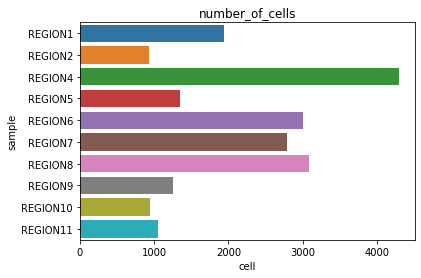

In [12]:
counts_cells=adata.obs.groupby('sample').count()
import seaborn as sns
count_cells=counts_cells.loc[samples,:]
count_cells['sample']=count_cells.index
sns.barplot(data=count_cells,y='sample',x='cell',orient='h')
plt.title('number_of_cells')
plt.show()

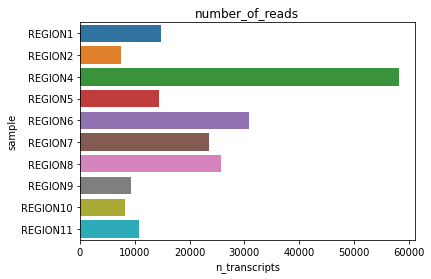

In [13]:
counts_reads=adata.obs.groupby('sample').sum()
adata.obs['more_than_3_reads']=list(np.sum(adata.X,axis=1)>3)
adata.obs['more_than_5_reads']=list(np.sum(adata.X,axis=1)>5)
import seaborn as sns
count_reads=counts_reads.loc[samples,:]
count_reads['sample']=count_reads.index
sns.barplot(data=count_reads,y='sample',x='n_transcripts',orient='h')
plt.title('number_of_reads')
plt.show()

In [14]:
count_reads

,cell,x,y,cluster,n_transcripts,density,elongation,area,avg_confidence,sample
sample,,,,,,,,,,
REGION1,1890540,7.451046e+06,8.585691e+06,5897,14734,5.097642e+01,481187.338,2.010493e+06,1927.5089,REGION1
REGION2,431985,4.090399e+06,3.610292e+06,2363,7422,1.491361e+01,37884.247,1.855020e+06,920.6005,REGION2
REGION4,9225660,2.310578e+07,2.144868e+07,9435,58179,inf,inf,6.066225e+06,4256.4457,REGION4
REGION5,910575,4.105820e+06,3.788025e+06,3426,14475,1.938700e+01,70345.029,2.325525e+06,1333.0594,REGION5
REGION6,4501500,1.118903e+07,1.324516e+07,6268,30933,5.986020e+01,229473.629,3.990237e+06,2973.9679,REGION6
REGION7,3896236,6.169474e+06,9.126543e+06,8180,23572,4.705366e+01,341669.809,3.584871e+06,2776.9528,REGION7
REGION8,4744740,1.736598e+07,1.466995e+07,6991,25818,8.054001e+08,inf,4.890921e+06,3058.5371,REGION8
REGION9,793170,6.720480e+06,7.991692e+06,2843,9296,1.532794e+01,60464.790,3.356549e+06,1248.6546,REGION9
REGION10,444153,5.158288e+06,3.358780e+06,2286,8218,8.873049e+00,23167.511,2.214573e+06,934.3348,REGION10


In [15]:
count_cells

,cell,x,y,cluster,n_transcripts,density,elongation,area,avg_confidence,condition,number,sample_ID,sample
sample,,,,,,,,,,,,,
REGION1,1944,1944,1944,1944,1944,1794,1794,1794,1944,1944,1944,1944,REGION1
REGION2,929,929,929,929,929,883,883,883,929,929,929,929,REGION2
REGION4,4295,4295,4295,4295,4295,4129,4129,4129,4295,4295,4295,4295,REGION4
REGION5,1349,1349,1349,1349,1349,1292,1292,1292,1349,1349,1349,1349,REGION5
REGION6,3000,3000,3000,3000,3000,2873,2873,2873,3000,3000,3000,3000,REGION6
REGION7,2791,2791,2791,2791,2791,2563,2563,2563,2791,2791,2791,2791,REGION7
REGION8,3080,3080,3080,3080,3080,2886,2886,2886,3080,3080,3080,3080,REGION8
REGION9,1259,1259,1259,1259,1259,1214,1214,1214,1259,1259,1259,1259,REGION9
REGION10,942,942,942,942,942,917,917,917,942,942,942,942,REGION10


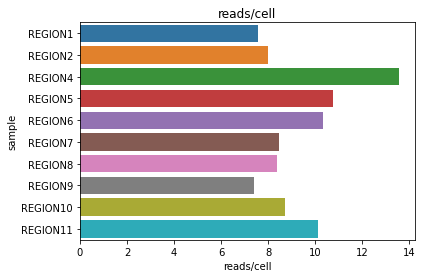

In [16]:
counts_reads['reads/cell']=count_reads['n_transcripts']/count_cells['cell']
count_reads=counts_reads.loc[samples,:]
count_reads['sample']=count_reads.index
sns.barplot(data=count_reads,y='sample',x='reads/cell',orient='h')
plt.title('reads/cell')
plt.show()

In [ ]:
counts_reads['prop>3_reads']=count_reads['more_than_3_reads']/count_cells['cell']
count_reads=counts_reads.loc[samples,:]
count_reads['sample']=count_reads.index
sns.barplot(data=count_reads,y='sample',x='prop>3_reads',orient='h')
plt.title('% of cells with >3 reads')
plt.show()

In [ ]:
counts_reads['prop>5_reads']=count_reads['more_than_5_reads']/count_cells['cell']
count_reads=counts_reads.loc[samples,:]
count_reads['sample']=count_reads.index
sns.barplot(data=count_reads,y='sample',x='prop>5_reads',orient='h')
plt.title('% of cells with >5 reads')
plt.show()

In [ ]:
counts_reads=adata.obs.groupby('sample').sum()
import seaborn as sns
count_reads=counts_reads.loc[samples,:]
count_reads['sample']=count_reads.index
sns.barplot(data=count_reads,y='sample',x='n_transcripts',orient='h')
plt.title('number_of_reads')
plt.show()

# Positivity 

In [19]:
positivity={'Smooth muscle cells':['MYL9', 'MYH11', 'ACTA2', 'TAGLN'],
'Basal cells': ['KRT5'],
'Suprabasal cells': ['S100A2'],
'Club cells': ['SCGB1A1','BPIFB1'],
'Multiciliated cells': ['CAPS','CD24'],
'Goblet cells': ['MUC5AC', 'AGR2','SLPI'],
'Endothelial cells': ['CLDN5', 'ACKR1', 'FCN3', 'RAMP2'],
'Deuterosomal cells': ['CDC20B'],
'Fibroblasts': ['FN1', 'A2M'],
'Neuroendocrine': ['GRP'],
'Macrophages': ['HLA-DRA'],
'B plasma':['JCHAIN'], }

In [20]:
len(positivity)

12

In [21]:
expres=pd.DataFrame(adata.X,columns=adata.var.index)

In [22]:
superexpressed=[]#['Smooth muscle cells','Club cells']

In [23]:
for cl in positivity.keys():
    expressub=expres.loc[:,expres.columns.isin(positivity[cl])]
    if cl in superexpressed:
        adata.obs[cl]=list((np.sum(expressub,axis=1)>1)*1)
    else:
        adata.obs[cl]=list((np.sum(expressub,axis=1)>0)*1)

In [24]:
posi=adata.obs.loc[:,adata.obs.columns.isin(positivity.keys())]

In [25]:
adata.obs['positivity_celltype']=list(posi.idxmax(axis=1))

In [26]:
adata.obs.loc[np.sum(posi,axis=1)==0,'positivity_celltype']='None'
adata.obs.loc[np.sum(posi,axis=1)>1,'positivity_celltype']='confused'

In [27]:
adata.obs.groupby('positivity_celltype').count()

,cell,x,y,cluster,n_transcripts,density,elongation,area,avg_confidence,sample,...,Suprabasal cells,Club cells,Multiciliated cells,Goblet cells,Endothelial cells,Deuterosomal cells,Fibroblasts,Neuroendocrine,Macrophages,B plasma
positivity_celltype,,,,,,,,,,,,,,,,,,,,,
B plasma,57,57,57,57,57,53,53,53,57,57,...,57,57,57,57,57,57,57,57,57,57
Basal cells,100,100,100,100,100,92,92,92,100,100,...,100,100,100,100,100,100,100,100,100,100
Club cells,2553,2553,2553,2553,2553,2464,2464,2464,2553,2553,...,2553,2553,2553,2553,2553,2553,2553,2553,2553,2553
Deuterosomal cells,25,25,25,25,25,24,24,24,25,25,...,25,25,25,25,25,25,25,25,25,25
Endothelial cells,452,452,452,452,452,439,439,439,452,452,...,452,452,452,452,452,452,452,452,452,452
Fibroblasts,515,515,515,515,515,491,491,491,515,515,...,515,515,515,515,515,515,515,515,515,515
Goblet cells,540,540,540,540,540,520,520,520,540,540,...,540,540,540,540,540,540,540,540,540,540
Macrophages,255,255,255,255,255,247,247,247,255,255,...,255,255,255,255,255,255,255,255,255,255
Multiciliated cells,698,698,698,698,698,675,675,675,698,698,...,698,698,698,698,698,698,698,698,698,698


In [28]:
adata.shape

(20647, 264)

In [29]:
maximum_numbers_of_reads=100
minimum_number_of_reads=3
import seaborn as sns
adata.obs['total_counts']=list(np.sum(adata.X,axis=1))
#sns.displot(adata.obs,x='total_counts')
#plt.axvline(x=maximum_numbers_of_reads,color='green',linestyle='--')
#plt.axvline(x=minimum_number_of_reads,color='red',linestyle='--')
adata=adata[adata.obs['total_counts']>minimum_number_of_reads] #adjust the numbers to keep good cells according to appropiate ones
adata=adata[adata.obs['total_counts']<maximum_numbers_of_reads] #adjust the numbers to more than

In [30]:
adata

View of AnnData object with n_obs × n_vars = 18330 × 264
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'condition', 'number', 'sample_ID', 'more_than_3_reads', 'more_than_5_reads', 'Smooth muscle cells', 'Basal cells', 'Suprabasal cells', 'Club cells', 'Multiciliated cells', 'Goblet cells', 'Endothelial cells', 'Deuterosomal cells', 'Fibroblasts', 'Neuroendocrine', 'Macrophages', 'B plasma', 'positivity_celltype', 'total_counts'

In [31]:
sc.pp.filter_cells(adata,min_genes=3)

Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [32]:
adata

AnnData object with n_obs × n_vars = 17879 × 264
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'condition', 'number', 'sample_ID', 'more_than_3_reads', 'more_than_5_reads', 'Smooth muscle cells', 'Basal cells', 'Suprabasal cells', 'Club cells', 'Multiciliated cells', 'Goblet cells', 'Endothelial cells', 'Deuterosomal cells', 'Fibroblasts', 'Neuroendocrine', 'Macrophages', 'B plasma', 'positivity_celltype', 'total_counts', 'n_genes'

In [33]:
sc.pp.normalize_total(adata, target_sum=100)
sc.pp.log1p(adata)

In [34]:
adata

AnnData object with n_obs × n_vars = 17879 × 264
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'condition', 'number', 'sample_ID', 'more_than_3_reads', 'more_than_5_reads', 'Smooth muscle cells', 'Basal cells', 'Suprabasal cells', 'Club cells', 'Multiciliated cells', 'Goblet cells', 'Endothelial cells', 'Deuterosomal cells', 'Fibroblasts', 'Neuroendocrine', 'Macrophages', 'B plasma', 'positivity_celltype', 'total_counts', 'n_genes'
    uns: 'log1p'

In [35]:
sc.pp.filter_cells(adata,min_genes=3)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [36]:
adata

AnnData object with n_obs × n_vars = 17879 × 264
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'condition', 'number', 'sample_ID', 'more_than_3_reads', 'more_than_5_reads', 'Smooth muscle cells', 'Basal cells', 'Suprabasal cells', 'Club cells', 'Multiciliated cells', 'Goblet cells', 'Endothelial cells', 'Deuterosomal cells', 'Fibroblasts', 'Neuroendocrine', 'Macrophages', 'B plasma', 'positivity_celltype', 'total_counts', 'n_genes'
    uns: 'log1p'

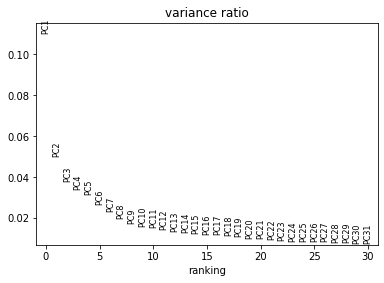

In [37]:
sc.tl.pca(adata, svd_solver='arpack')
plt.rcParams['figure.facecolor'] = 'white'
sc.pl.pca_variance_ratio(adata, log=False)

In [38]:
#sc.pp.subsample(adata,0.1)

In [39]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=0)

In [40]:
sc.tl.leiden(adata,resolution=1.0)

In [41]:
sc.tl.umap(adata,min_dist=0.4)

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
sc.set_figure_params(figsize=(6,5),dpi=100)
sc.pl.umap(adata,color=['positivity_celltype'],cmap='hsv',s=10)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

In [43]:
adata

AnnData object with n_obs × n_vars = 17879 × 264
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'condition', 'number', 'sample_ID', 'more_than_3_reads', 'more_than_5_reads', 'Smooth muscle cells', 'Basal cells', 'Suprabasal cells', 'Club cells', 'Multiciliated cells', 'Goblet cells', 'Endothelial cells', 'Deuterosomal cells', 'Fibroblasts', 'Neuroendocrine', 'Macrophages', 'B plasma', 'positivity_celltype', 'total_counts', 'n_genes', 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'positivity_celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

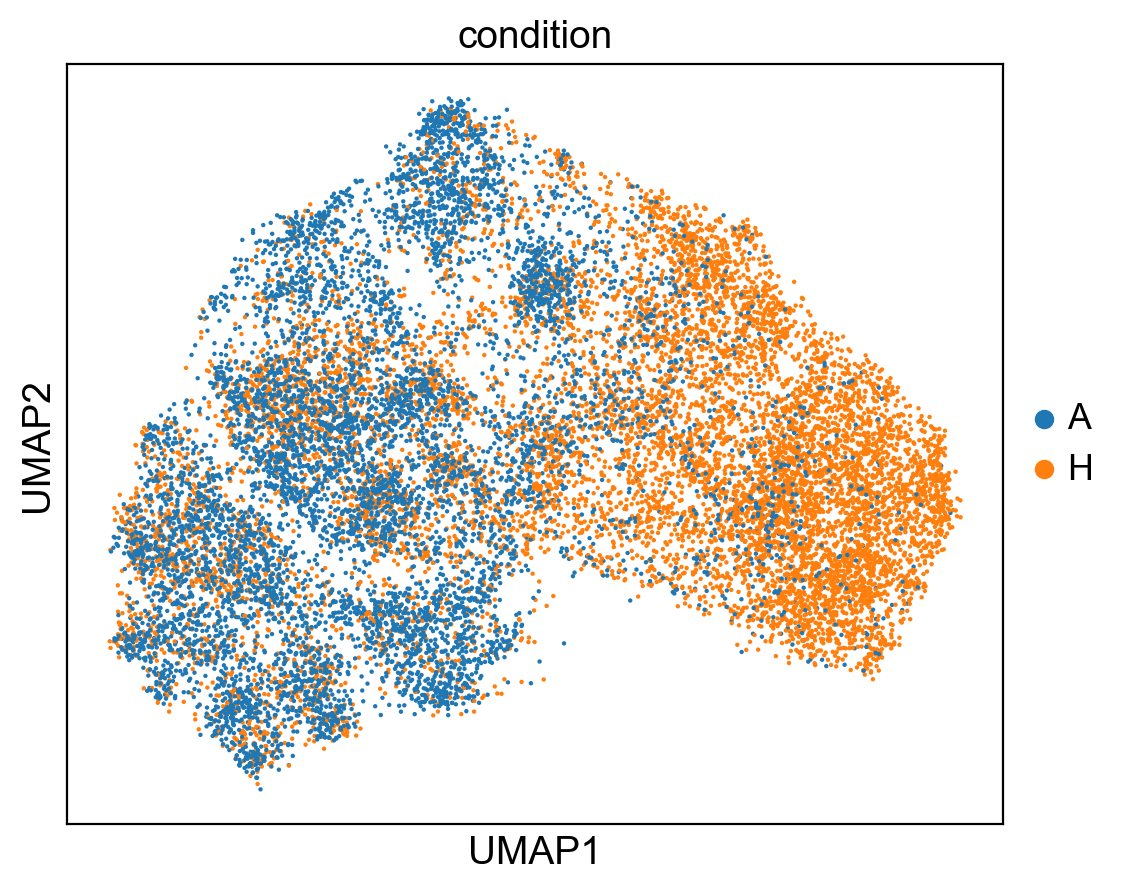

In [44]:
plt.rcParams['figure.facecolor'] = 'white'
sc.set_figure_params(figsize=(6,5),dpi=100)
sc.pl.umap(adata,color=['condition'],cmap='hsv',s=10)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

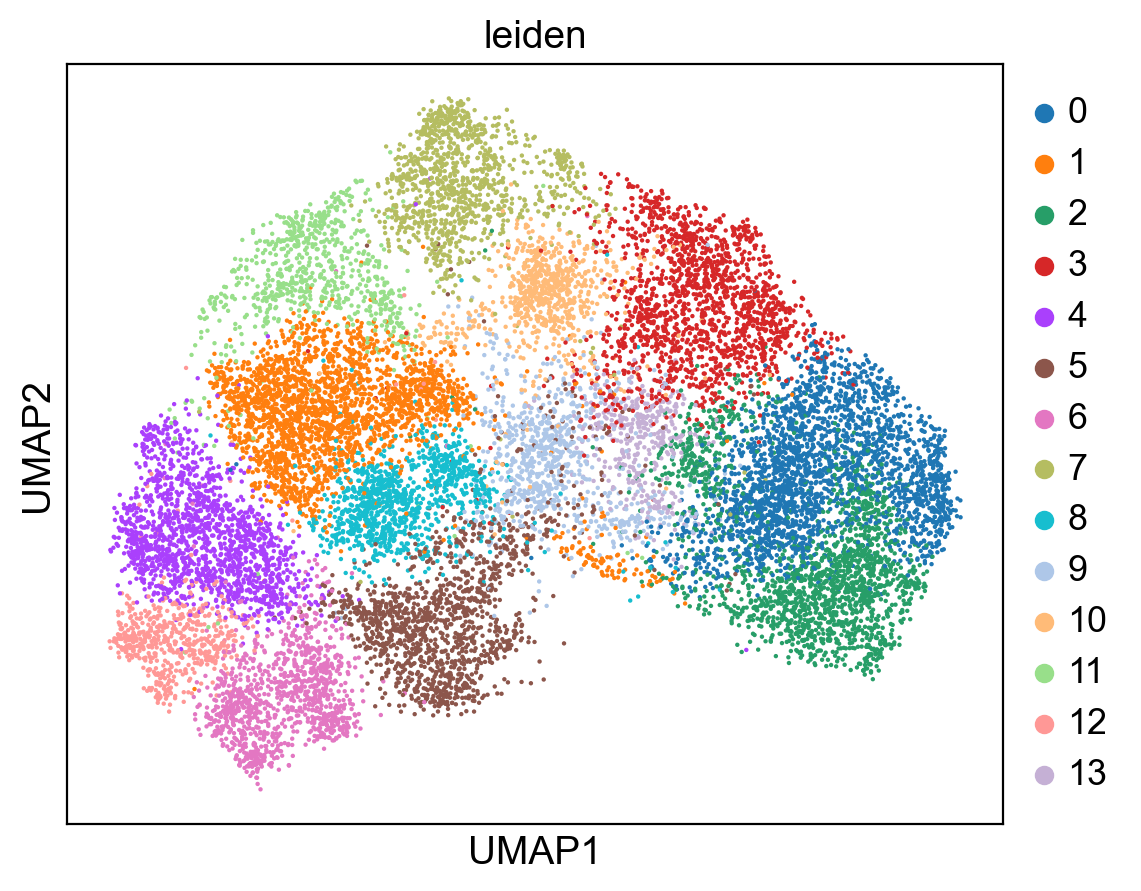

In [45]:
plt.rcParams['figure.facecolor'] = 'white'
sc.set_figure_params(figsize=(6,5),dpi=100)
sc.pl.umap(adata,color=['leiden'],cmap='hsv',s=10)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

In [46]:
markers=['MYL9', 'MYH11', 'ACTA2', 'TAGLN','KRT5','S100A2','SCGB1A1', 'BPIFB1','CAPS', 'CD24','MUC5AC', 'AGR2', 'SLPI','CLDN5', 'ACKR1', 'FCN3', 'RAMP2','CDC20B','FN1', 'A2M','GRP','HLA-DRA','JCHAIN']

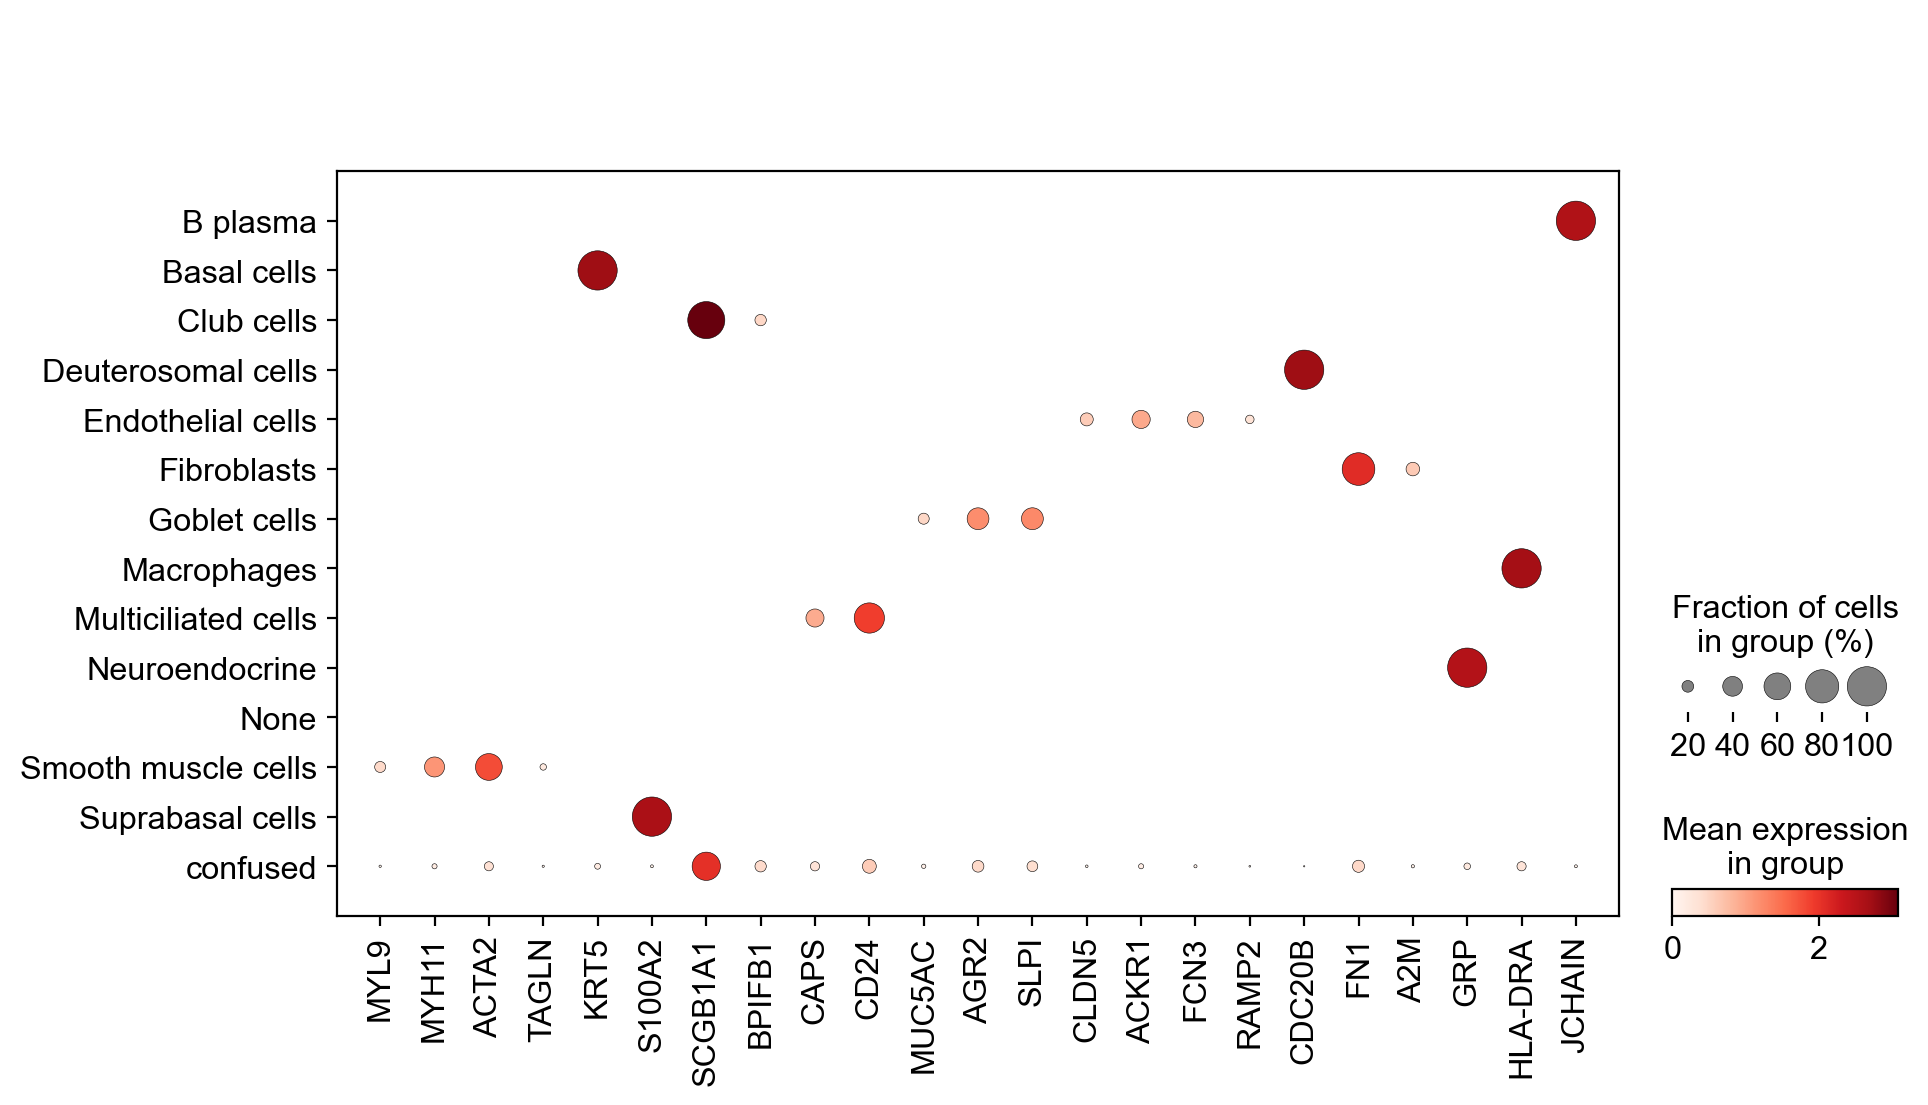

In [47]:
sc.pl.dotplot(adata,markers,groupby='positivity_celltype')

In [48]:
adata.obs.groupby('condition').count()

,cell,x,y,cluster,n_transcripts,density,elongation,area,avg_confidence,sample,...,Endothelial cells,Deuterosomal cells,Fibroblasts,Neuroendocrine,Macrophages,B plasma,positivity_celltype,total_counts,n_genes,leiden
condition,,,,,,,,,,,,,,,,,,,,,
A,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771,...,7771,7771,7771,7771,7771,7771,7771,7771,7771,7771
H,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108,...,10108,10108,10108,10108,10108,10108,10108,10108,10108,10108


In [91]:
pd.crosstab(adata.obs['positivity_celltype'],adata.obs['sample']).to_csv('E:/Analysis/positivity_based_celltypes_by_sample.csv')

In [140]:
ct=pd.crosstab(adata.obs['sample'].astype(str),adata.obs['positivity_celltype'])

In [152]:
ct_norm=ct.div(ct.sum(axis=1),axis=0)
ct_norm.columns=ct_norm.columns.astype(str)
ct_norm['sample']=list(ct_norm.index)

In [161]:
ct_norm=ct_norm.loc[samples,['None','confused','B plasma', 'Basal cells', 'Club cells', 'Deuterosomal cells',
       'Endothelial cells', 'Fibroblasts', 'Goblet cells', 'Macrophages',
       'Multiciliated cells', 'Neuroendocrine', 'Smooth muscle cells',
       'Suprabasal cells', 'sample']]

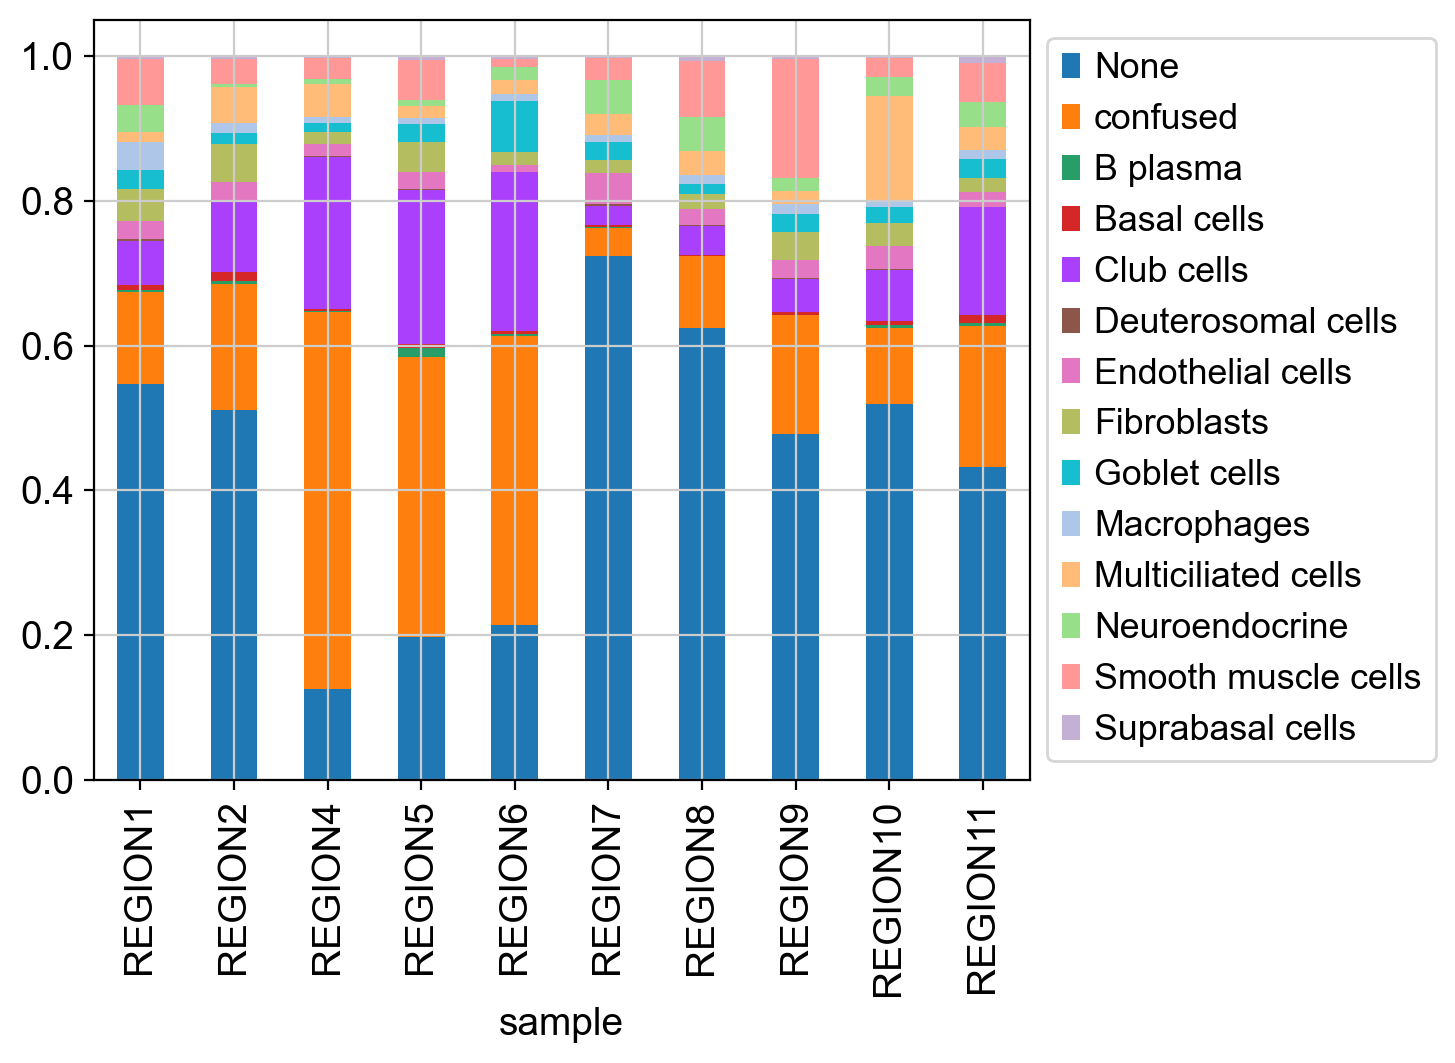

In [162]:
ct_norm.set_index('sample').plot(kind='bar', stacked=True, color=adata.uns['positivity_celltype_colors'])
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
sc.set_figure_params(figsize=(14,10),dpi=600)
sc.pl.umap(adata,color=['condition'],cmap='hsv',s=30)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

In [169]:
adata

AnnData object with n_obs × n_vars = 17879 × 264
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'condition', 'number', 'sample_ID', 'more_than_3_reads', 'more_than_5_reads', 'Smooth muscle cells', 'Basal cells', 'Suprabasal cells', 'Club cells', 'Multiciliated cells', 'Goblet cells', 'Endothelial cells', 'Deuterosomal cells', 'Fibroblasts', 'Neuroendocrine', 'Macrophages', 'B plasma', 'positivity_celltype', 'total_counts', 'n_genes', 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'positivity_celltype_colors', 'leiden_colors', 'condition_colors', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
for ss in adata.obs['sample'].unique():
    plt.rcParams['figure.facecolor'] = 'white'
    sc.set_figure_params(figsize=(2,2),dpi=600)
    adatasub=adata[adata.obs['sample']==ss]
    sc.pl.umap(adatasub,color=['sample'],cmap='hsv',s=10)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

In [174]:
sc.tl.dendrogram(adata,groupby='sample')

In [ ]:
sc.pl.dendrogram(adata,groupby='sample')

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=40)

In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
sc.set_figure_params(figsize=(14,10),dpi=600)
sc.pl.umap(adata,color=['leiden'],cmap='hsv',s=30)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

In [41]:
cluster_by_sample=pd.crosstab(adata.obs['leiden'],adata.obs['sample'])

In [42]:
cdv=cluster_by_sample.div(cluster_by_sample.sum(axis=0),axis=1)

In [43]:
cd=cdv.div(cdv.sum(axis=1),axis=0)

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cd,vmax=0.5)

In [177]:
adata.write('E:/Analysis/adata/adata_10asthma_positivity_celltype.h5ad')

In [3]:
adata=sc.read(r'E:/Analysis/adata/adata_10asthma_positivity_celltype.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
plt.rcParams['figure.facecolor'] = 'white'
sc.set_figure_params(figsize=(14,10),dpi=600)
sc.pl.umap(adata,color=['total_counts'],cmap='hsv',s=30)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.set_figure_params(figsize=(5,5),dpi=200)
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False,fontsize=14)

In [47]:
def map_of_clusters(adata,key='leiden',clusters='all',size=8,background='white',figuresize=(10,7),save=None,format='pdf'):
    
    #PARAMETERS TO MODIFY:
    #-key: the terms in adata.obs that you want to plot
    #-clusters:'all' for plotting all clusters in a single plot, 'individual': for plots of individual genes, or ['3','5'] (your groups
    #          between square brackets to plot only some clusters
    #-size: to change the size of your spots
    #-background: to change the color of the background
    #-figuresize: to specify the size of your figure
    #-save: if you want to save your figure, give the PATH of the folder where you want to save it
    #-format: specify the format in which you want to save your figure
    
    try:
        adata.obs[key]=adata.obs[key].astype(int)
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    except:
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    #cl.apply(lambda x: colors[x])
    plt.rcParams['figure.facecolor'] = background
    if clusters=='all':
        cl=adata.obs[key]
        plt.figure(figsize=figuresize)
        figa=plt.scatter(x=adata.obs.X,y=adata.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        if not save==None:
            plt.savefig(save +'/map_all_clusters_'+str(size)+'_'+background+'_'+key+'.'+format)
    elif clusters=='individual':
        cl=adata.obs[key]
        for each in adata.obs[key].unique():
            adatasub=adata[adata.obs[key]==each]
            plt.figure(figsize=figuresize)
            plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
            cl=adatasub.obs[key]
            plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
            plt.axis('off')
            plt.title('Group: '+ str(each))
            if not save==None:
                plt.savefig(save +'/map_inidivdual_cluster_'+str(each)+'_'+str(size)+background+'_'+key+'.'+format)
    else:
        adatasub=adata[adata.obs[key].isin(clusters)]
        plt.figure(figsize=figuresize)
        plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
        cl=adatasub.obs[key]
        plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        plt.legend()
        if not save==None:
                s=''
                for element in clusters:
                    s=s+str(element)
                print(s)
                plt.savefig(save +'/map_group_of_clusters_'+str(s)+'_'+str(size)+background+'_'+key+'.'+format)
#        plt.title('Group: '+ paste(clusters))

In [48]:
adata.obs['sample'].unique()

['REGION1', 'REGION10', 'REGION11', 'REGION2', 'REGION4', 'REGION5', 'REGION6', 'REGION7', 'REGION8', 'REGION9']
Categories (10, object): ['REGION1', 'REGION10', 'REGION11', 'REGION2', ..., 'REGION6', 'REGION7', 'REGION8', 'REGION9']

In [ ]:
adata.obs['X']=adata.obs['x']
adata.obs['Y']=adata.obs['y']
for a in adata.obs['sample'].unique():
    ads=adata[adata.obs['sample']==a]
#    sc.pl.umap(ads,color=['leiden'],cmap='hsv',s=30)#,'total_counts'])#,save='chickbrain_UMAP_bins.pdf')
    map_of_clusters(ads,key='positivity_celltype',figuresize=(7,7),size=20,clusters='all')

In [98]:
map_of_clusters?

In [183]:
tb=pd.crosstab(adata.obs['positivity_celltype'].astype(str),adata.obs['sample'].astype(str))

In [185]:
tb.index

Index(['B plasma', 'Basal cells', 'Club cells', 'Deuterosomal cells',
       'Endothelial cells', 'Fibroblasts', 'Goblet cells', 'Macrophages',
       'Multiciliated cells', 'Neuroendocrine', 'None', 'Smooth muscle cells',
       'Suprabasal cells', 'confused'],
      dtype='object', name='positivity_celltype')

In [187]:
tb=tb.loc[tb.index.isin(['B plasma', 'Basal cells', 'Club cells', 'Deuterosomal cells',
       'Endothelial cells', 'Fibroblasts', 'Goblet cells', 'Macrophages',
       'Multiciliated cells', 'Neuroendocrine', 'Smooth muscle cells',
       'Suprabasal cells']),:]

In [188]:
tbs=tb.div(tb.sum(axis=0),axis=1).transpose()

In [189]:
tbs['ct']=list(tbs.index)

In [190]:
tbs=tbs.loc[['REGION1', 'REGION2', 'REGION4', 'REGION5',
       'REGION6', 'REGION7', 'REGION8', 'REGION9','REGION10', 'REGION11'],:]

In [200]:
positivity

{'Smooth muscle cells': ['MYL9', 'MYH11', 'ACTA2', 'TAGLN'],
 'Basal cells': ['KRT5'],
 'Suprabasal cells': ['S100A2'],
 'Club cells': ['SCGB1A1', 'BPIFB1'],
 'Multiciliated cells': ['CAPS', 'CD24'],
 'Goblet cells': ['MUC5AC', 'AGR2', 'SLPI'],
 'Endothelial cells': ['CLDN5', 'ACKR1', 'FCN3', 'RAMP2'],
 'Deuterosomal cells': ['CDC20B'],
 'Fibroblasts': ['FN1', 'A2M'],
 'Neuroendocrine': ['GRP'],
 'Macrophages': ['HLA-DRA'],
 'B plasma': ['JCHAIN']}

In [222]:
expr=pd.DataFrame(adata.X,columns=adata.var.index)

In [223]:
expr.columns

Index(['A2M', 'ACAN', 'ACKR1', 'ACTA2', 'ADIRF', 'AGER', 'AGR2', 'ALDH1A3',
       'ANXA2', 'APOC1',
       ...
       'VSIG2', 'WFDC2', 'WIF1', 'WNT11', 'WNT2', 'WNT2B', 'WNT5A', 'WNT7B',
       'ZFP36', 'ZG16B'],
      dtype='object', name='gene', length=264)

In [224]:
expr.index=adata.obs['sample'].astype(str)

In [229]:
groupexp=expr.groupby('sample').sum()

In [234]:
groupexp_norm=groupexp.div(groupexp.sum(axis=1),axis=0)

In [239]:
groupexp_norm['sample']=groupexp_norm.index

In [245]:
groupexp_norm=groupexp_norm.loc[samples,:]

In [ ]:
sns.set(font_scale=0.3)
for s in tbs.columns[:-1]:
    plt.figure(figsize=(1,1))
    sns.barplot(data=tbs,x=s,y='ct',orient='h')
    plt.title(s)
    plt.show()
    for mark in positivity[s]:
        plt.figure(figsize=(1,1))
        sns.barplot(data=groupexp_norm,x=mark,y='sample',orient='h')
        plt.title(mark)

# DEG

In [ ]:

nchanges=[]
for g in adata.obs['positivity_celltype'].unique():    
    try:
        adatasub=adata[adata.obs['positivity_celltype']==g]
        sc.tl.rank_genes_groups(adatasub, 'condition', method='wilcoxon')
        print(g)
        sc.pl.rank_genes_groups(adatasub, n_genes=20)
        result = adatasub.uns['rank_genes_groups']
        groups = result['names'].dtype.names
        df=pd.DataFrame(
            {group + '_' + key[:1]: result[key][group]
            for group in groups for key in ['names', 'pvals']}).head(20)
        df2=df.loc[:,['A_n','A_p']]
        df2.columns=['Gene','p_value']
        df2['condition']='Asthma'
        df3=df.loc[:,['H_n','H_p']]
        df3.columns=['Gene','p_value']
        df3['condition']='Healthy'
        concatenated_pvals=pd.concat([df2,df3])
        concatenated_pvals['celltype']=g
        sig_pvals=concatenated_pvals[concatenated_pvals['p_value']<0.05]
        concatenated_pvals.to_csv('E:/Analysis/significant_DEG_plots/'+g+'_allgenes_scanpy.csv')
        sig_pvals.to_csv('E:/Analysis/significant_DEG_plots/'+g+'_sigpvals_scanpy.csv')
        plt.figure(figsize=(1,1))
        sc.pl.dotplot(adatasub,sig_pvals['Gene'],groupby='condition',show=False)
        plt.savefig('E:/Analysis/significant_DEG_plots/'+g+'_dotplot.pdf')
        nchanges.append(sig_pvals.shape[0])
        try:
            alto=pd.concat([alto,sig_pvals])
        except:
            alto=sig_pvals
    except:
        print('not_possible')
        nchanges.append(0)

In [146]:
alto=alto[~alto['celltype'].isin(['None','confused'])]
alto=alto.sort_values(by='p_value',ascending=False)
alto=alto.reset_index()
alto['index']=alto.index
alto['pv']=alto['p_value'].astype(float).round(7)

In [183]:
alto.to_csv('E:/Analysis/significant_DEG_plots/all_significant_genes_together.csv')

In [181]:
alto

,index,Gene,p_value,condition,celltype,pv
0,0,DLL1,4.746733e-02,Asthma,Club cells,0.047467
1,1,MYH11,4.364715e-02,Asthma,Smooth muscle cells,0.043647
2,2,CDC20B,4.225402e-02,Healthy,Deuterosomal cells,0.042254
3,3,EN2,3.959554e-02,Healthy,Smooth muscle cells,0.039595
4,4,NOTCH2,3.922845e-02,Asthma,Deuterosomal cells,0.039228
...,...,...,...,...,...,...
58,58,NOTCH2,1.696019e-11,Asthma,Club cells,0.000000
59,59,S100A11,5.570772e-12,Healthy,Multiciliated cells,0.000000
60,60,BMX,1.145807e-20,Healthy,Club cells,0.000000
61,61,EN2,7.162637e-22,Asthma,Club cells,0.000000


In [ ]:
ax=sns.scatterplot(data=alto,x='index',y='pv',hue='celltype',shape=)
ax.set_yscale('log')

In [196]:
altohel=alto[alto['condition']=='Healthy']
altoasm=alto[alto['condition']=='Asthma']

In [197]:
genexcelltype_hel=pd.crosstab(altohel['Gene'],altohel['celltype'])
genexcelltype_asm=pd.crosstab(altoasm['Gene'],altoasm['celltype'])

In [ ]:
sns.clustermap(genexcelltype_asm,cmap='Reds')

In [ ]:
sns.clustermap(genexcelltype_hel,cmap='Blues')

In [109]:
genes_changing=pd.DataFrame([adata.obs['positivity_celltype'].unique(),nchanges],columns=['celltype','ngenes'])
genes_changing=genes_changing.loc[~genes_changing['celltype'].isin(['None','confused']),:]
genes_changing['celltype']=genes_changing['celltype'].astype(str)

<AxesSubplot:xlabel='ngenes', ylabel='celltype'>

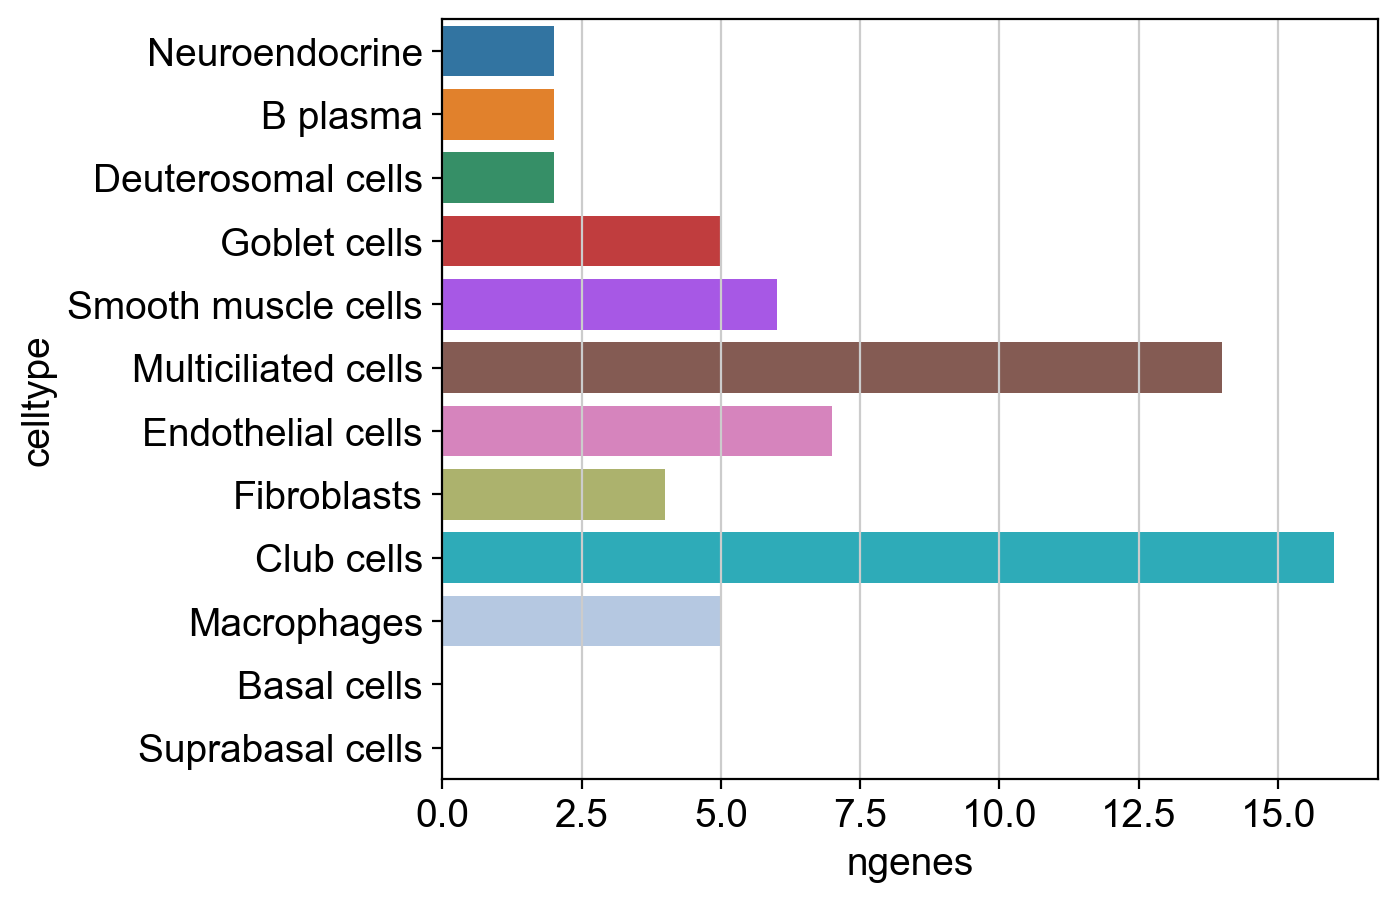

In [110]:
sns.barplot(data=genes_changing,y='celltype',x='ngenes',orient='h')

In [ ]:
#?gseapy.enrichr
glist = sc.get.rank_genes_groups_df(adatasub, group='condition', 
                                    log2fc_min=0.25, 
                                    pval_cutoff=0.01)['names'].squeeze().str.strip().tolist()
print(len(glist))

# DEG asthma vs healthy (initial_analysis)

In [30]:
!pip install researchpy

In [50]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats
dic={'REGION1':'H','REGION2':'H','REGION4':'H','REGION5':'H',
'REGION6':'H','REGION7':'A','REGION8':'A','REGION9':'A','REGION10':'A','REGION11':'A'}

In [ ]:
for ctp in adata.obs['positivity_celltype'].unique():
    asub=adata[adata.obs['positivity_celltype']==ctp]
    ts_pre=pd.DataFrame(asub.X,columns=asub.var.index)
    ts_pre['sample']=list(asub.obs['sample'])
    ts=ts_pre.groupby('sample').mean()
    ts=ts.transpose()
    tsn=(ts/np.sum(ts))*100
    pvals=[]
    ts=[]
    for n in range(0,tsn.shape[0]):
        summ,results=rp.ttest(group1= tsn.iloc[n,:][tsn.columns.map(dic)=='H'], group1_name= "H",
             group2= tsn.iloc[n,:][tsn.columns.map(dic)=='A'], group2_name= "A")
        t=results.iloc[2,1] # this is t
        pvalue=results.iloc[3,1] # this is PVALUE
        pvals.append(pvalue)
        ts.append(t)
    ttest_results=pd.DataFrame([pvals,ts],columns=tsn.index,index=['pvalue','t']).transpose()
    ttest_results=ttest_results.sort_values(by='pvalue')
    significative=ttest_results[ttest_results['pvalue']<0.05]
    print(ctp)
    print(significative)
    try:
        plt.figure(figsize=(10,10))
        plt.scatter(significative['t'],significative['pvalue'])
        for sig in range(0,significative.shape[0]):
            plt.text(significative.iloc[sig,1],significative.iloc[sig,0],significative.index[sig])
        plt.xlabel('t value')
        plt.ylabel('p value')
        plt.title(ctp)
        plt.savefig('/mnt/e/Analysis/significant_DEG_plots/'+ctp+'.pdf')
        pd.DataFrame(ttest_results).to_csv('/mnt/e/Analysis/significant_DEG_plots/'+ctp+'_allgenes.csv')
        pd.DataFrame(significative).to_csv('/mnt/e/Analysis/significant_DEG_plots/'+ctp+'_significative.csv')
    except:
        print('not_possible')

In [31]:
pd.DataFrame(significative).to_csv('/mnt/e/Analysis/significant_DEG_plots/'+ctp+'_allgenes.csv')

In [ ]:
# counts x cell as indicator of sample quality 
# n cells x celltype --take plots of the markers
# 

# overall positivity

In [12]:
markers1=['KRT5','TFF3','BPIFB1','CAPS','CD74','CD79A','GNLY','GZMB','CXCR2','BTG1','CPA3','CHI3L1','APOD','DCN','FBLN1','FN1','GPX3','ACTA2','ADIRF','KRT15','WFDC2','MYL9','C1QC']

<Figure size 1200x800 with 0 Axes>

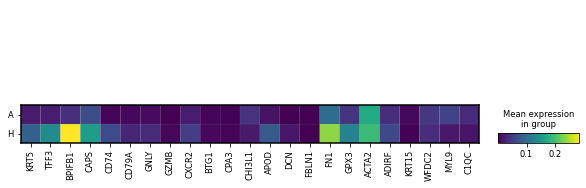

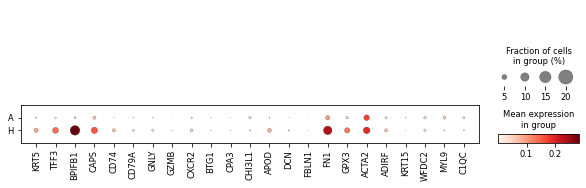

In [17]:
plt.figure(dpi=200)
sc.pl.matrixplot(adata,markers1,groupby='condition',save='markers1')
sc.pl.dotplot(adata,markers1,groupby='condition',save='markers1')

In [18]:
markers2=[    'WNT2B','FZD2','ETV1','SFRP2','ETV3','DLL1','DLL3','DLL4','NOTCH3','NOTCH4','HEY1','PDGFA','PDGFC','KDR','FLT4','VEGFC','VEGFD','VEGFB','HGF','ETS1']

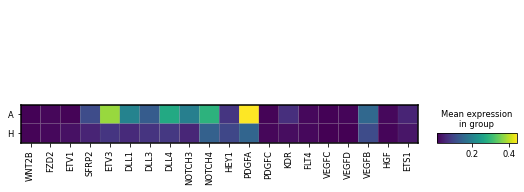

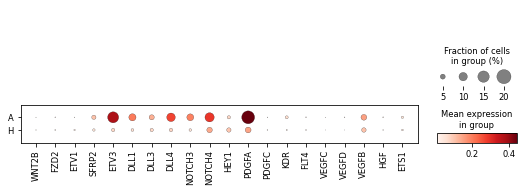

In [19]:
sc.pl.matrixplot(adata,markers2,groupby='condition',save='markers2')
sc.pl.dotplot(adata,markers2,groupby='condition',save='markers2')